In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import *

Данные загружены


In [2]:
fs, data_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1938/MIC2.WAV')
fs, data_60cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1945/MIC2.WAV')
fs, data_120cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1947/MIC2.WAV')
fs, data_180cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1950/MIC2.WAV')
fs, data_240cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1953/MIC2.WAV')
fs, data_315cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_2001/MIC2.WAV')

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6742/3866503165.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1938/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6742/3866503165.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_60cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1945/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6742/3866503165.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_120cm = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_1020/2025_1020_1947/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6742/3866503165.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_180cm = wavfile.read('/Users/bogda/Desk

In [3]:
# octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
# lower_bounds = octave_boundaries[:-1]
# upper_bounds = octave_boundaries[1:]
# center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона

In [4]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500])  # Центральные частоты как середина диапазона
RMS_microphone_60 = []
RMS_microphone_120 = []
RMS_microphone_180 = []
RMS_microphone_240 = []
RMS_microphone_315 = []

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


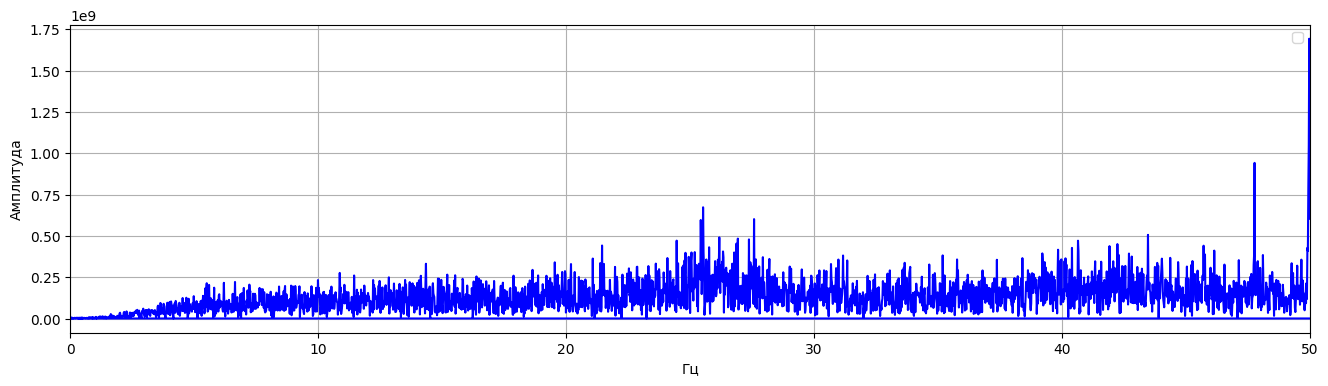

In [17]:
signal = data_120cm
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(f, np.abs(fft(signal)), color='blue')
plt.legend()
plt.xlabel("Гц")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.xlim(0,50)
plt.show()

In [ ]:
RMS_microphone = [RMS_microphone_60, RMS_microphone_120, RMS_microphone_180, RMS_microphone_240, RMS_microphone_315]
signals = [data_60cm, data_120cm, data_180cm, data_240cm, data_315cm]
for i in range (0,len(RMS_microphone)):
    signal = signals[i]
    for f1, f2 in zip(lower_bounds, upper_bounds):
        data_filt = ifft(filt_freq(fft(signal), f1, f2, fs))
        amp = RMS(data_filt)
        RMS_microphone[i].append(amp)


In [7]:
len(RMS_microphone)

5

In [8]:
RMS_distance = np.transpose(RMS_microphone)

In [9]:
len(RMS_distance[0])

5

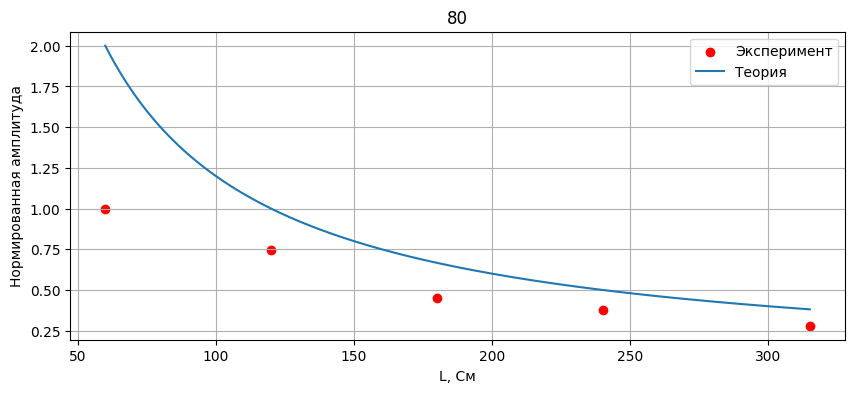

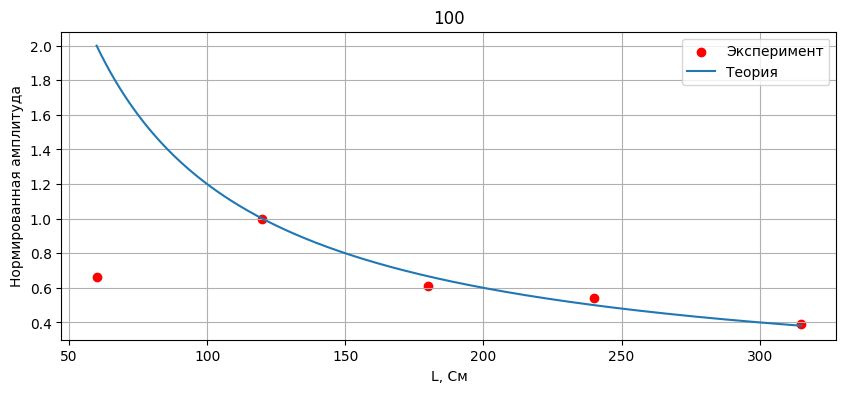

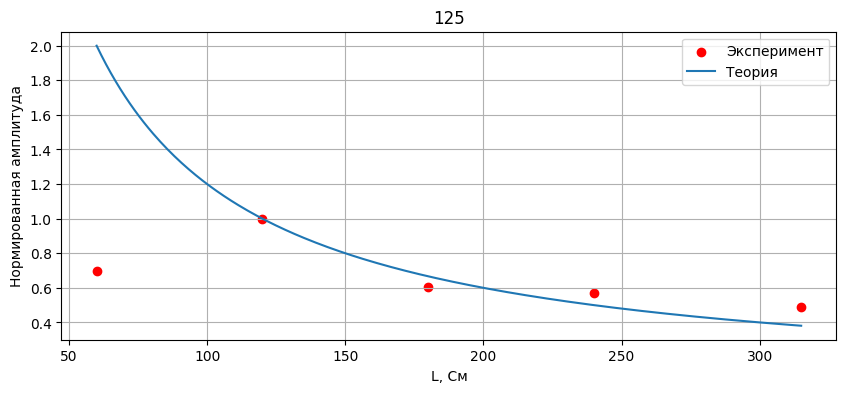

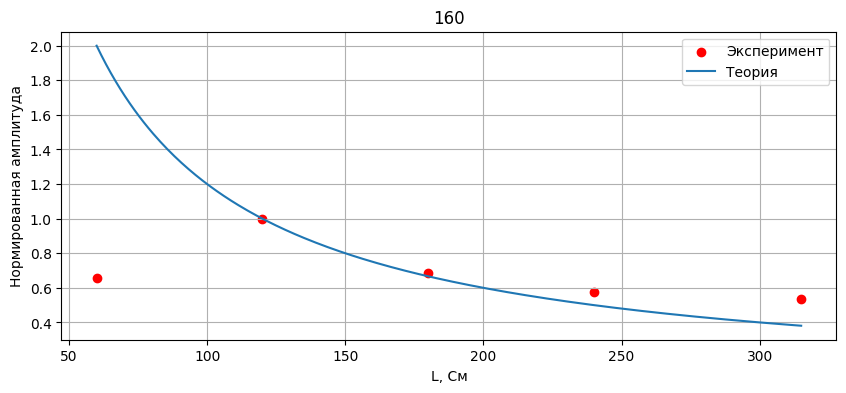

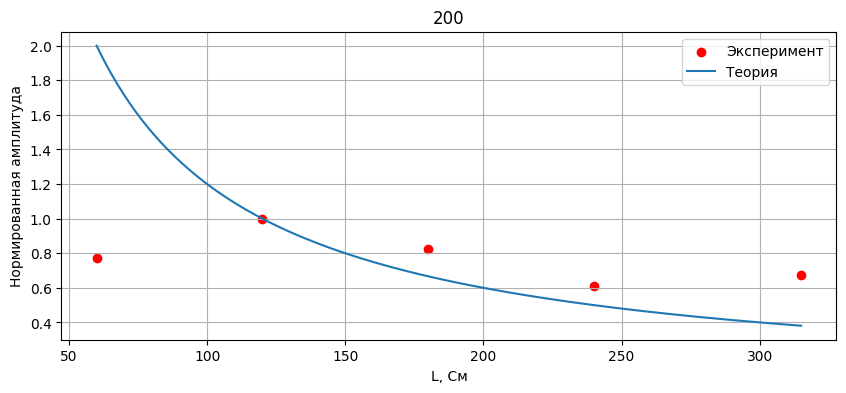

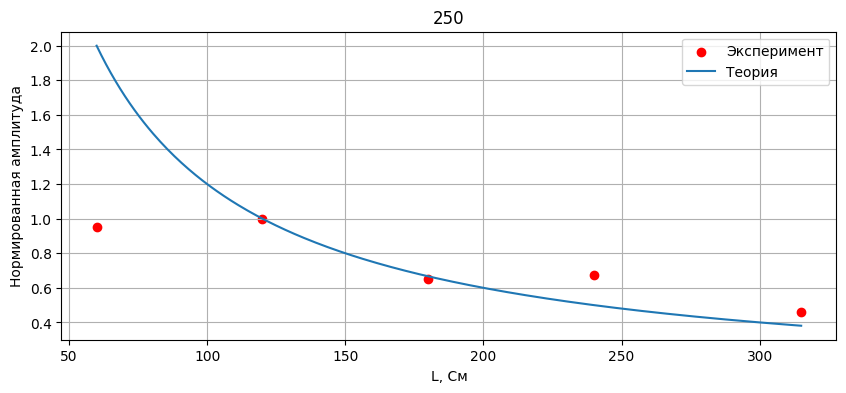

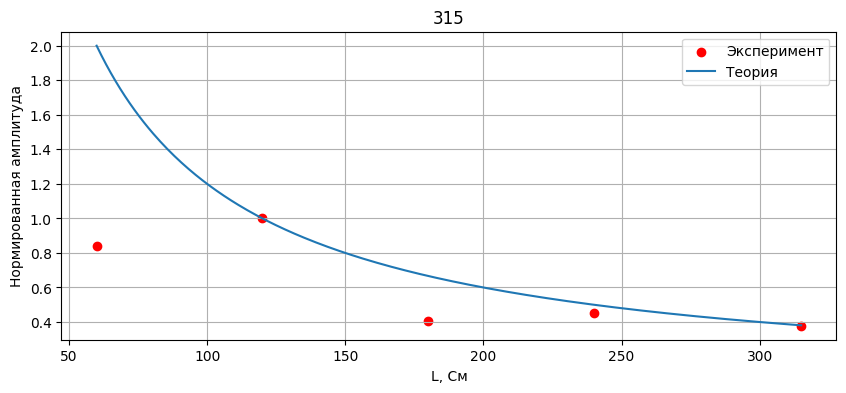

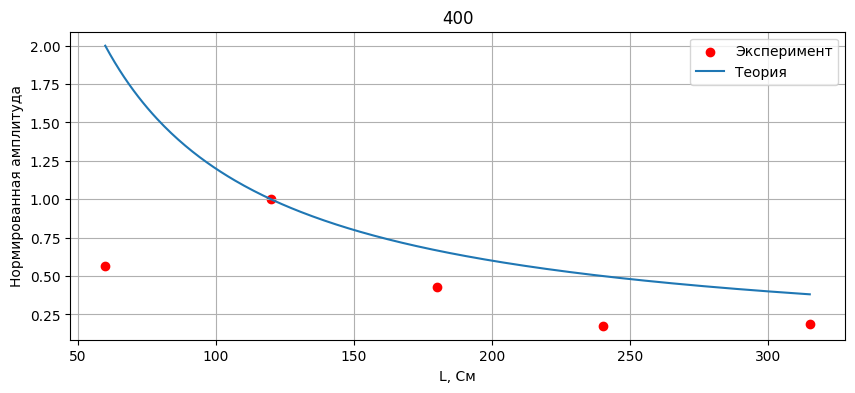

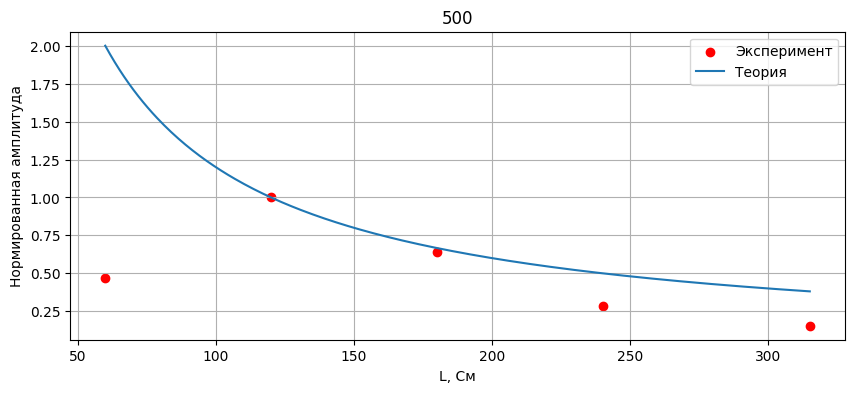

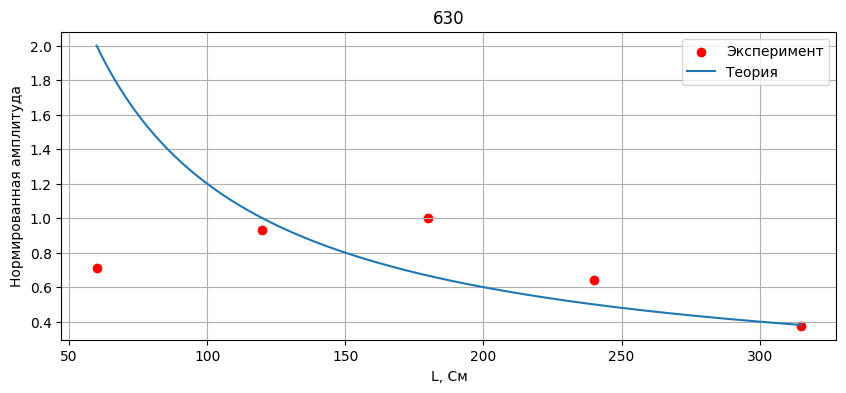

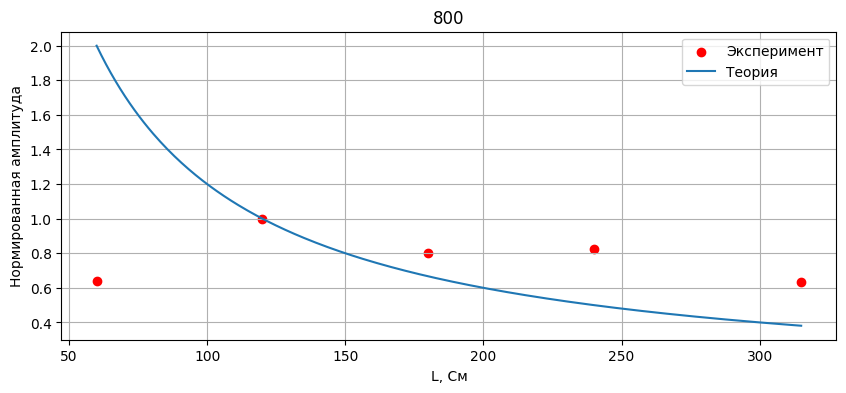

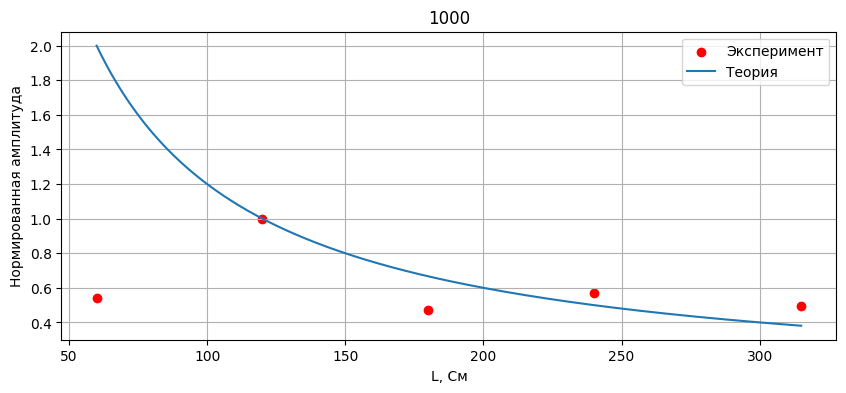

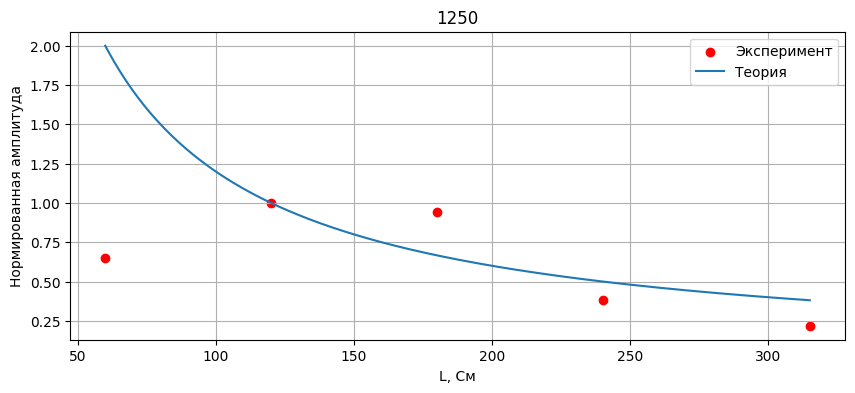

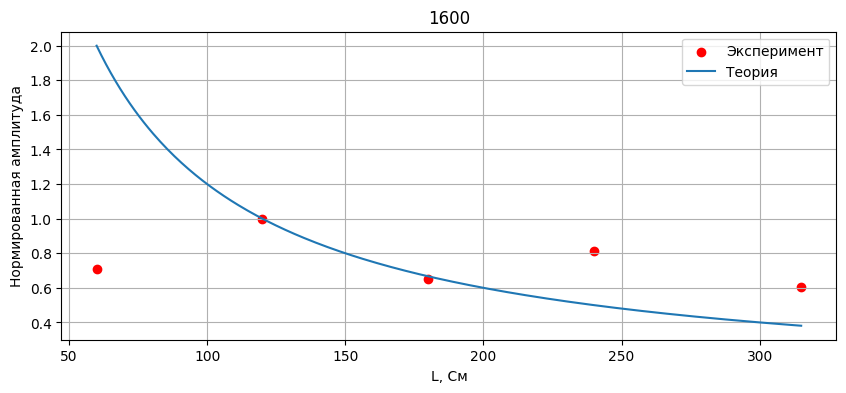

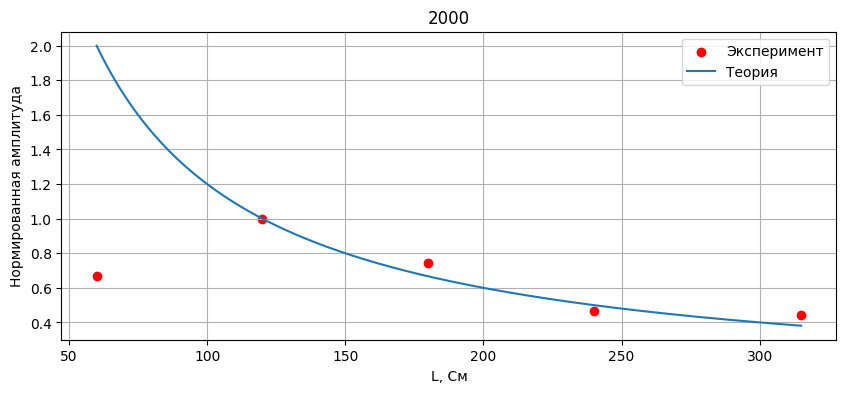

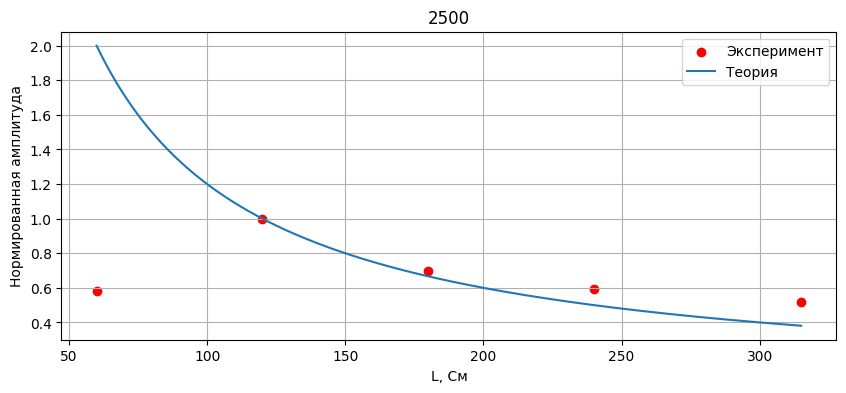

In [12]:
x = np.linspace(60, 315, 300)
distance = [60, 120, 180, 240, 315]
RMS_microphone_norm = RMS_distance

for i in range (0,len(RMS_microphone_norm)):
    RMS_microphone_norm[i] = RMS_microphone_norm[i]/np.max(RMS_microphone_norm[i])


def func (x):
    return 120/x
for i in range (0, len(RMS_distance)):

    plt.figure(figsize=(10,4))
    plt.scatter(distance, RMS_distance[i], label = "Эксперимент", color = 'red')
    plt.plot(x, func(x), label = 'Теория')
    plt.grid(True)
    plt.xlabel("L, См")
    plt.ylabel("Нормированная амплитуда")
    plt.title(center_freqs[i])
    plt.legend()
    plt.show()
